In [71]:
from pandas import *
import pandas as pd


import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
dataset = pd.read_csv('train2.csv') 
test = pd.read_csv('test2.csv')

In [10]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1387, 81)
Unseen Data For Predictions: (73, 81)


In [66]:
from pycaret.regression import *
pepehands = setup(data = data, target = 'SalePrice', categorical_imputation = 'mode' , remove_outliers = True, session_id=123)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1387, 81)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,59
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [78]:
data.shape

(1387, 81)

In [46]:
compare_models(exclude = ['ransac','tr'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,16568.9301,915297912.8497,29374.0791,0.8419,0.1337,0.0936,4.6548
1,Gradient Boosting Regressor,18352.2906,1072330236.2608,31377.8874,0.8134,0.1459,0.1048,1.2139
2,Light Gradient Boosting Machine,19041.2054,1165441049.8903,33322.0139,0.8068,0.1522,0.1063,0.2299
3,Random Forest,19519.4871,1224808803.3989,34094.0165,0.7922,0.1603,0.1136,0.8477
4,Extreme Gradient Boosting,19428.4181,1247186551.0525,34423.8477,0.7851,0.1566,0.1083,2.0181
5,AdaBoost Regressor,26652.8630,1538299633.7455,38839.2198,0.7443,0.2186,0.1754,0.4485
6,Extra Trees Regressor,24387.6358,1792887156.6662,41152.3087,0.7092,0.1952,0.1412,1.0414
7,Orthogonal Matching Pursuit,18952.3615,1437767357.1882,34879.9986,0.7041,0.1570,0.1114,0.0191
8,Lasso Least Angle Regression,18722.5907,1496942065.1700,35546.9728,0.7000,0.1566,0.1109,0.0429
9,Ridge Regression,20411.1553,1575367561.2589,37476.0434,0.6927,0.2066,0.1209,0.0192


In [67]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17895.1453,723248710.1920,26893.2837,0.8270,0.1636,0.1116
1,473678169.4145,10611735370280986624.0000,3257565865.8392,-1448890905.5779,1.6773,2078.0469
2,13792.4978,408806071.9405,20218.9533,0.8941,0.1778,0.1122
3,157653891.6250,2286155524828659456.0000,1512003811.1158,-408105676.8496,1.1046,399.7571
4,18208.9662,562578319.2107,23718.7335,0.9463,0.1894,0.0991
5,7557097169.5495,4909838036985104564224.0000,70070236455.8955,-1089241140421.5842,2.0740,101231.7488
6,15616928.4272,22368523565309756.0000,149561103.1161,-2627586.8137,0.9980,127.9403
7,16342.0633,556778948.9443,23596.1639,0.8859,0.1492,0.1212
8,70176158.5892,452797351706857920.0000,672902185.8390,-45097643.1628,1.1548,649.6816
9,23815.5279,1862978476.6090,43162.2344,0.5868,0.2725,0.1464


In [68]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13997.7458,370448442.8347,19247.0372,0.9114,0.1123,0.0858
1,17452.9912,840469544.5172,28990.8528,0.8852,0.1446,0.1032
2,14392.3394,375508221.1525,19378.0345,0.9027,0.1726,0.1172
3,17049.8240,679964136.7606,26076.1220,0.8786,0.1415,0.1002
4,18481.7563,903006883.6342,30050.0729,0.9138,0.1243,0.0905
5,15631.3364,652811696.1156,25550.1800,0.8552,0.1625,0.1139
6,21574.4722,1042975021.9393,32295.1238,0.8775,0.1551,0.1153
7,14147.4241,342440623.9159,18505.1513,0.9298,0.1132,0.0891
8,19128.4509,952388736.7114,30860.7961,0.9051,0.1333,0.0967
9,18767.7398,853086063.8026,29207.6371,0.8108,0.1456,0.1093


In [93]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model.Lasso,True
ridge,Ridge Regression,sklearn.linear_model.Ridge,True
en,Elastic Net,sklearn.linear_model.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model.OMP,True
br,Bayesian Ridge,sklearn.linear_model.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model.ARDRegression,False


In [69]:
cat = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,12491.1724,293673272.9656,17136.8980,0.9298,0.0962,0.0739
1,16280.5796,806557559.9860,28399.9570,0.8899,0.1377,0.0957
2,11180.3476,244525297.9106,15637.3047,0.9366,0.1511,0.0938
3,14748.0657,530575573.6310,23034.2261,0.9053,0.1217,0.0851
4,17065.8438,673255099.1856,25947.1598,0.9358,0.1198,0.0868
5,14104.0631,576811570.1105,24016.9018,0.8720,0.1455,0.1008
6,19064.1744,1092238569.5436,33049.0328,0.8717,0.1414,0.0960
7,13011.2298,316241198.5867,17783.1718,0.9352,0.1044,0.0799
8,17153.0551,1065315289.8464,32639.1680,0.8939,0.1139,0.0790
9,14256.4385,420951443.3038,20517.1012,0.9066,0.1128,0.0853


In [94]:
xgboost = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16380.3903,524467682.4128,22901.2594,0.8745,0.1367,0.0993
1,19728.7843,1064261347.3304,32623.0187,0.8547,0.1590,0.1164
2,14530.1061,382453750.8327,19556.4248,0.9009,0.1709,0.1158
3,18661.9878,937714555.1628,30622.1253,0.8326,0.1568,0.1108
4,23791.3381,1576879210.4492,39709.9384,0.8495,0.1508,0.1081
5,18172.7597,925512929.0863,30422.2440,0.7947,0.1710,0.1226
6,23173.5594,1465580982.5769,38282.9072,0.8278,0.1654,0.1185
7,17580.5451,593832509.4277,24368.6789,0.8783,0.1603,0.1121
8,24033.7728,1632822884.0732,40408.2032,0.8374,0.1665,0.1157
9,20157.4123,1236645792.2008,35165.9749,0.7257,0.1554,0.1110


In [74]:
lgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13244.1628,308857562.1544,17574.3439,0.9261,0.1007,0.0771
1,19557.0907,1049427895.0561,32394.8745,0.8567,0.1582,0.1153
2,14105.1757,375463964.3257,19376.8925,0.9027,0.1654,0.1095
3,18286.7445,832376950.4004,28850.9437,0.8514,0.1562,0.1101
4,18510.5612,903352374.8559,30055.8210,0.9138,0.1297,0.0920
5,14397.6801,586297851.3146,24213.5882,0.8699,0.1536,0.1041
6,22171.1059,1201707456.5085,34665.6524,0.8588,0.1619,0.1152
7,15897.2182,444512056.8168,21083.4546,0.9089,0.1440,0.1050
8,21801.3304,1461879454.9998,38234.5322,0.8544,0.1495,0.1031
9,18884.5160,1022408588.3319,31975.1245,0.7732,0.1456,0.1072


In [76]:
tuned_lgbm = tune_model(lgbm)

IntProgress(value=0, description='Processing: ', max=16)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:10:58
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,MAE,MSE,RMSE,R2,RMSLE,MAPE


exception calling callback for <Future at 0x7fcc59e9a790 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/Users/klinsy/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/Users/klinsy/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 347, in __call__
    self.parallel.dispatch_next()
  File "/Users/klinsy/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 780, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/Users/klinsy/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/klinsy/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/Users/klinsy/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", 

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

In [75]:
blender = blend_models(estimator_list = [lgbm, cat, gbr])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,12403.1209,280514725.0840,16748.5738,0.9329,0.0967,0.0744
1,16779.2835,847744051.1648,29116.0446,0.8843,0.1428,0.0989
2,12534.5041,292636493.8307,17106.6213,0.9242,0.1589,0.1024
3,16002.9090,637794770.4196,25254.5990,0.8861,0.1359,0.0944
4,17129.1970,767413096.3322,27702.2219,0.9268,0.1199,0.0860
5,13969.2074,565607835.5678,23782.5111,0.8745,0.1494,0.1007
6,20291.7764,1063319838.5273,32608.5853,0.8751,0.1479,0.1043
7,13651.5791,325367744.9086,18037.9529,0.9333,0.1154,0.0870
8,18345.5968,1075103984.2151,32788.7783,0.8929,0.1265,0.0881
9,16379.1462,670753414.3857,25898.9076,0.8512,0.1296,0.0952


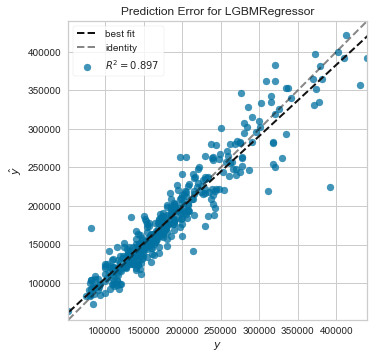

In [90]:
plot_model(lgbm, plot = 'error')

In [80]:
predict_model(lr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,6.894383e+08,9.155810e+19,9.568600e+09,-1.841305e+10,1.2833,4851.7788


In [81]:
predict_model(blender);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,14058.6063,4.563185e+08,21361.6124,0.9082,0.108,0.0782


In [82]:
predict_model(cat)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,14430.8593,4.768855e+08,21837.7071,0.9041,0.1097,0.0798


,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,Label
0,397.0,60.000000,7200.0,1972.0,1972.0,0.0,777.0,0.0,117.0,894.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,123000.0,127020.4487
1,1091.0,60.000000,8544.0,1950.0,1950.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,92900.0,96604.8278
2,1149.0,70.142606,5700.0,1926.0,1950.0,0.0,0.0,0.0,572.0,572.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,116900.0,107316.7268
3,342.0,60.000000,8400.0,1950.0,1950.0,0.0,0.0,0.0,721.0,721.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,82000.0,83627.6436
4,149.0,63.000000,7500.0,2004.0,2005.0,120.0,680.0,0.0,400.0,1080.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,141000.0,138404.3668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,1423.0,37.000000,4435.0,2003.0,2003.0,170.0,686.0,0.0,162.0,848.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,136500.0,143838.5584
392,614.0,70.000000,8402.0,2007.0,2007.0,0.0,206.0,0.0,914.0,1120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,147000.0,122259.0115
393,674.0,110.000000,14442.0,1957.0,2004.0,106.0,1186.0,0.0,291.0,1477.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,257500.0,242917.2979
394,183.0,60.000000,9060.0,1957.0,2006.0,98.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,120000.0,133623.3958


In [83]:
predict_model(lgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,15270.9287,5.106346e+08,22597.2244,0.8973,0.1156,0.0846


,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,Label
0,397.0,60.000000,7200.0,1972.0,1972.0,0.0,777.0,0.0,117.0,894.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,123000.0,132699.4217
1,1091.0,60.000000,8544.0,1950.0,1950.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,92900.0,95400.9649
2,1149.0,70.142606,5700.0,1926.0,1950.0,0.0,0.0,0.0,572.0,572.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,116900.0,111196.2791
3,342.0,60.000000,8400.0,1950.0,1950.0,0.0,0.0,0.0,721.0,721.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,82000.0,92858.7622
4,149.0,63.000000,7500.0,2004.0,2005.0,120.0,680.0,0.0,400.0,1080.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,141000.0,139136.4193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,1423.0,37.000000,4435.0,2003.0,2003.0,170.0,686.0,0.0,162.0,848.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,136500.0,147437.8660
392,614.0,70.000000,8402.0,2007.0,2007.0,0.0,206.0,0.0,914.0,1120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,147000.0,112329.2439
393,674.0,110.000000,14442.0,1957.0,2004.0,106.0,1186.0,0.0,291.0,1477.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,257500.0,257425.5531
394,183.0,60.000000,9060.0,1957.0,2006.0,98.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,120000.0,128017.0458


In [95]:
xgboost = predict_model(xgboost, data = test)

In [96]:
xgboost.to_csv('xgboost.csv')

In [72]:
catboost = predict_model(cat, data = test)

In [73]:
catboost.to_csv('CatHouse.csv')

In [61]:
lightgbm = predict_model(lgbm, data = test)

In [62]:
lightgbm.to_csv('Lightgbm.csv')

In [84]:
blendered = predict_model(blender, data = test)

In [85]:
blendered.to_csv('Blendered.csv')

In [91]:
gbr = predict_model(gbr, data = test)

In [92]:
gbr.to_csv('gbr.csv')